In [116]:
import numpy as np # linear algebra
import pandas as pd

import torch                                       #Pytorch pkg & tensor library
import torchvision                                 
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools as itertools

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

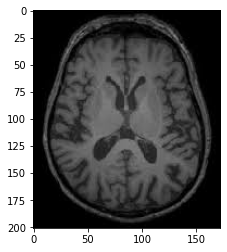

In [117]:
img = mpimg.imread('../input/brain-mri-images-for-brain-tumor-detection/no/10 no.jpg') 
  
# Output Images 
plt.imshow(img)

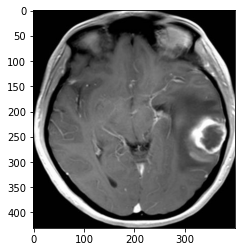

In [118]:
img = mpimg.imread('../input/brain-mri-images-for-brain-tumor-detection/yes/Y154.jpg') 
  
# Output Images 
plt.imshow(img)

In [119]:

import torch
from torchvision import datasets

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

# EXAMPLE USAGE:
# instantiate the dataset and dataloader
data_dir = "../input/brain-mri-images-for-brain-tumor-detection"
dataset = ImageFolderWithPaths(data_dir) # our custom dataset

In [120]:
dataset

Dataset ImageFolderWithPaths
    Number of datapoints: 506
    Root location: ../input/brain-mri-images-for-brain-tumor-detection

In [121]:
dataset[100]

(<PIL.Image.Image image mode=RGB size=287x348 at 0x7F53D19AF110>,
 0,
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y100.JPG')

In [122]:
dataset[5][2]

'../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/14 no.jpg'

All images are of different sizes

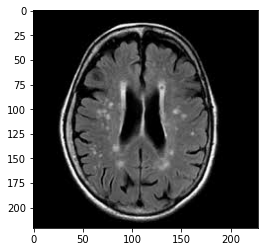

In [123]:
img = mpimg.imread(dataset[8][2]) 
  
# Output Images 
plt.imshow(img)

In [124]:
type(dataset)

__main__.ImageFolderWithPaths

# Making List of Paths

In [125]:
img_path=[]
for i in range(253):
    img_path.append(dataset[i][2])
img_path

['../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/1 no.jpeg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/10 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/11 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/12 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/13 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/14 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/15 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/17 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/18 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/19 no.jpg',
 '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/2 no.jpeg',
 '../input/brain-mri-

In [126]:
# Checking if any duplicates
set([x for x in img_path if img_path.count(x) > 1])

# if this returns empty set, then all paths are unique

set()

# Making list of Images

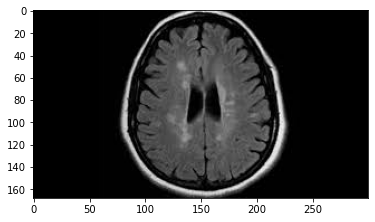

In [127]:
img_list=[]

for i in range(len(img_path)):
    k= mpimg.imread(img_path[i])
    img_list.append(k)
plt.imshow(img_list[4])

Shape of Each Image:

In [128]:
img_list[1].shape

(201, 173, 3)

# Converting each Image to Tensor and resizing all to same shape

As we have seen above that all the images are of different shapes 

cpu


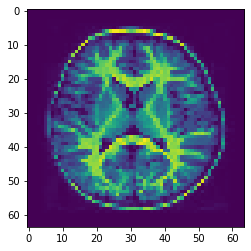

Shape of this image is:torch.Size([64, 64])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [129]:
# Experimenting on sample
import cv2

img = cv2.resize(img_list[5], (64, 64))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

plt.imshow(img)
plt.show()

img =torch.tensor(img, device=device).float()
print("Shape of this image is:" + str(img.shape))
img

# Checking if there is any gray scaled mage in the data, before converting all images to gray scale

- Defining a function *check_image*, to see if a particular image in *img_path* is gray
- Adding all such paths to a new list, ***gray_img_path***
- Appending all gray images to new list, ***gray_img_list***

In [130]:
def check_image(img_path): 
    image = mpimg.imread(img_path)
    if(len(image.shape)<3):
        return 1
    else:
        return 0
#           print ('gray')
#     elif len(image.shape)==3:
#           print ('Color(RGB)')
#     else:
#           print ('others')

In [131]:
gray_img_path=[] # This list will contain paths of al the gray scaled images 

for i in range(len(img_path)):
    k= check_image(img_path[i])
    if k==1:
        gray_img_path.append(img_path[i])
        

In [132]:
# The length of gray_img will show the total number of gray images
len(gray_img_path)

30

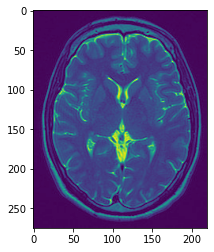

In [133]:
gray_img_list=[]

for i in range(len(gray_img_path)):
    k= mpimg.imread(gray_img_path[i])
    gray_img_list.append(k)
plt.imshow(gray_img_list[4])

# Making list of tensors of all images

- Looping the above snippet ***(Converting each Image to Tensor and resizing all to same shape)*** for all images

- The already gray scaled images ***(gray_img)*** will only be resized.

In [144]:
img_tensor=[]
for i in range(len(img_list)):
#     img = cv2.resize(img_list[i], (64, 64))
    
    for j in range(len(gray_img_list)):
        if img_list[i] in gray_img_list[j] is True:
            img_gray = cv2.resize(img_list[i], (64, 64))
            img_gray =torch.tensor(img_gray, device=device).float()
            img_tensor.append(img_gray)
                
    else:
        
        img = cv2.resize(img_list[i], (64, 64))
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #     print(device)

    #     plt.imshow(img)
    #     plt.show()

        img =torch.tensor(img, device=device).float()
        # print("Shape of this image is:" + str(img.shape))
        # img
        img_tensor.append(img)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


error: OpenCV(4.3.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
a= img_tensor[98]
a.shape

# Assigning Labels

As already given in the dataset, the '**no**' contatins **98** images and '**yes**' folder contains **155** images.
Hence we can assign '**0**' to first **98** elements of img_tensor and '**1**' to the rest.

- We have list of tensors, 'img_tensor'
- We will generate list of labels, 'Y'

The above operation will be done by creating list 'data_list' which will contain tupels of tensors and labels.

- 'data_list' will further be shuffeled
- Then all the tupel elements will be converted to lists, since tupels are not callable

In [ ]:
# Creating a list of labels 'Y'

Y=[]
for i in range(253):
    if i<98:
        Y.append(0)
    else:
        Y.append(1)

Y= torch.tensor(Y) # Converting list to tensor
print(Y[0])
print(Y[252])

In [ ]:
data_list=[]

for i in range(len(Y)):
    inter= (img_tensor[i], Y[i])
    data_list.append(inter)
data_list[98]

In [ ]:
print(data_list[98][0])
print(data_list[98][1])

In [ ]:
len(data_list)

In [ ]:
#Shuffeling the data_list
import random

data_list_shuffel= random.sample(data_list, len(data_list))

In [ ]:
len(data_list_shuffel)

In [ ]:
# Just incase
t=(594,949,49,94,949,449,4,994,949,44,94,94,94,9)
tl= list(t)
type(tl)

In [ ]:
t=[(876,987), (987, 9876)]
for i in range(len(t)):
    t[i]= list(t[i])
t

In [ ]:
# data_dic = {img_tensor[i]: Y[i] for i in range(len(Y))}

In [ ]:
# data_dic

In [ ]:
# len(data_dic)

# Getting the data ready for input in Neural Network

- Dividing data into train(230 elements of data_list_shuffel) and test(23 elements of data_list_shuffel) 

In [ ]:
train_data_list= data_list_shuffel[: 229]
test_data_list=  data_list_shuffel[230:]

print(len(train_data_list))
print(len(test_data_list))